# 导入第三方库

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import *
from math import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from collections import Counter

# 数据输入和准备

In [3]:
otu_label = pd.read_csv("otutab_all.csv",header=0,index_col=0)
otu = otu_label.drop("label",axis=1)
label = otu_label["label"]
label[label=="XR"] = "PL"
label[label=="JK"] = "NM"
label[label=="JZ"] = "AA"
label[label=="FJ"] = "NAA"

<ipython-input-3-b53c83cb9c76>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="XR"] = "PL"
<ipython-input-3-b53c83cb9c76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="JK"] = "NM"
<ipython-input-3-b53c83cb9c76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="JZ"] = "AA"
<ipython-input-3-b53c83cb9c76>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [52]:
##-------------------定义特征筛选函数----------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def filter(otu_f,thread):
    n = len(otu_f)
    columns = otu_f.columns
    indexs = otu_f.index
    # 删除表达低的特征并对样本进行归一化
    for col in columns:
        more_thread = round(len(otu_f.loc[otu_f[col]>thread,col])/n,2)*100
        if more_thread < 10:
            otu_f.drop(col,axis=1,inplace=True)
    mm = MinMaxScaler()
    mm_data = mm.fit_transform(np.transpose(otu_f))
    otu_result = pd.DataFrame(np.transpose(mm_data))
    otu_result.columns = otu_f.columns     
    return otu_result
otu_filter = otu
otu_filter = filter(otu_filter,10)

In [54]:
otu_filter.index = otu.index
otu_filter = np.transpose(otu_filter)

In [55]:
numeric_cols = otu_filter.columns[otu_filter.dtypes != "object"]
numeric_col_sum =otu_filter.loc[:,numeric_cols].sum()
otu_filter.loc[:,numeric_cols] = otu_filter.loc[:,numeric_cols]/numeric_col_sum*100
otu_label=pd.concat([label, np.transpose(otu_filter)], axis=1)

In [56]:
otu = otu_label.drop("label",axis=1)
label = otu_label["label"]

Text(0, 0.5, 'raw_sample_var')

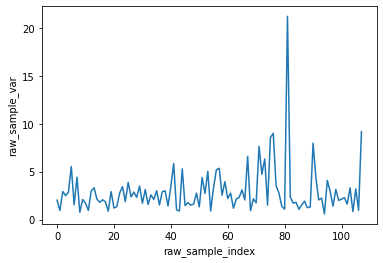

In [57]:
arr_var = np.var(otu,axis=1)
plt.plot(range(0,len(label)),arr_var) 
plt.xlabel("raw_sample_index")
plt.ylabel("raw_sample_var")
# plt.savefig("raw_sample_var.svg", format="svg") #保存矢量图

Text(0, 0.5, 'filter_sample_var')

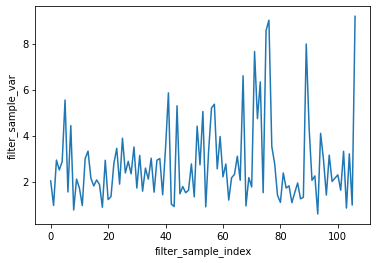

In [58]:
arr_var[arr_var<=4]
otu_filter1 = otu[np.var(otu,axis=1)<=3]
arr_var = np.var(otu_filter1,axis=1)
plt.plot(range(0,len(arr_var)),arr_var) 
plt.xlabel("filter_sample_index")
plt.ylabel("filter_sample_var")
# plt.savefig("filter_sample_var.svg", format="svg") #保存矢量图

In [59]:
index = otu_filter1.index
label = label[index]

In [60]:
otu_label=pd.concat([label, otu_filter1], axis=1)

In [61]:
Counter(otu_label["label"])

Counter({'NAA': 17, 'CR': 23, 'NM': 30, 'AA': 21, 'PL': 16})

In [13]:
# import seaborn as sns
# a = list(feature_imp.head(5).index)
# a.append("label")
# data = pd.DataFrame(otu_label[a])
# sns.pairplot(data,hue="label")
# plt.savefig("otu-feature_xianguan.svg",format="svg")

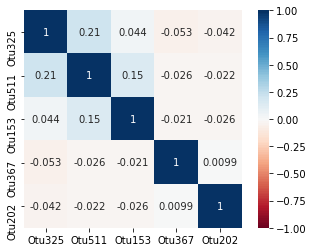

In [52]:
import scipy.stats as ss
#导入相应的模块
a = list(feature_imp.head(5).index)
sns.set_context(font_scale=1.5)
#设置字体大小为1.5倍
df = pd.DataFrame(otu_label[a])
#读入数据
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=128),annot=True, square=True)
#画热力图，图例最小值 -1，最大值1，颜色对象设为红蓝('RdBu'),颜色数目为128
plt.savefig("OTU-xianguan-retu.svg",format="svg")

In [62]:
Counter(label)
# otu_label.to_csv("otu_label_all0316.csv",index=1)

Counter({'NAA': 17, 'CR': 23, 'NM': 30, 'AA': 21, 'PL': 16})

# 训练集和测试集划分

In [63]:
##---------训练集和测试集划分---------未考虑测序批次
# X = otu_label[filter_feature.index]
X=otu_label.drop(['label'], axis=1)# Features
y=otu_label['label']
# otu_label.to_csv("otutab_norm.csv",index=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2050,shuffle=True)
X_train

,Otu2,Otu114,Otu4,Otu19,Otu26,Otu80,Otu15,Otu125,Otu17,Otu16,...,Otu492,Otu508,Otu325,Otu161,Otu520,Otu353,Otu217,Otu147,Otu193,Otu470
sample,,,,,,,,,,,,,,,,,,,,,
NH15,1.106262,0.000000,4.236040,8.063485,0.000000,0.002780,2.810129,0.000000,6.687606,0.016677,...,0.000000,0.002780,0.000000,0.005559,0.000000,0.000000,1.156294,1.915112,0.205687,0.06393
NH40,16.942964,0.000000,0.002268,0.861776,0.002268,0.000000,0.034017,0.002268,0.154212,8.982878,...,0.000000,0.000000,0.000000,0.031750,0.000000,0.015875,0.000000,0.000000,0.000000,0.00000
NH168,5.872722,0.180964,0.021543,4.752467,1.240898,0.000000,4.855875,0.000000,1.574820,0.002154,...,0.008617,0.002154,0.047395,0.000000,0.000000,0.331768,0.000000,0.000000,0.000000,0.00000
NH79,1.908373,0.000000,0.006216,0.000000,3.692422,0.000000,0.009324,0.000000,5.324175,0.000000,...,0.000000,0.000000,0.133648,0.000000,0.236216,0.000000,0.000000,0.000000,0.000000,0.00000
NH167,28.110066,7.616313,0.004286,0.000000,3.126674,0.000000,0.289308,0.000000,1.828001,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NH111,0.012448,0.000000,0.000000,0.000000,0.946019,0.000000,0.000000,0.000000,22.293681,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
NH29,20.064178,0.000000,0.007349,0.000000,0.100431,0.000000,0.156771,0.000000,0.127376,0.002450,...,0.000000,0.000000,0.208211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
NH22,29.421894,0.000000,0.000000,0.000000,1.869619,0.000000,0.098401,0.000000,0.633456,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [50]:
otu_108 = pd.read_csv("otu_108.csv",index_col=0,sep = ",")
label = otu_108["label"]
label[label=="xr"] = "PL"
label[label=="jk"] = "NM"
label[label=="jz"] = "AA"
label[label=="fjz"] = "NAA"
label[label=="cr"] = "CR"
Counter(label)

<ipython-input-50-509d9dadb097>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="xr"] = "PL"
<ipython-input-50-509d9dadb097>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="jk"] = "NM"
<ipython-input-50-509d9dadb097>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label[label=="jz"] = "AA"
<ipython-input-50-509d9dadb097>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

Counter({'NAA': 18, 'CR': 23, 'NM': 30, 'AA': 21, 'PL': 16})

In [45]:
otu_filter = pd.DataFrame(index=otu_108.index,columns=otu.columns,data=0)
match_label = otu.columns[otu.columns.isin(otu_108.columns)]
no_label = otu.columns.drop(match_label)
otu_filter1 = otu_108[match_label]
otu_filter2 = otu_filter[no_label]
otu_filter = pd.concat([otu_filter1, otu_filter2], axis=1)
otu_filter = np.transpose(otu_filter)
otu_filter

,Otu133,Otu2,Otu159,Otu138,Otu37,Otu13,Otu26,Otu60,Otu4,Otu112,...,Otu317,Otu428,Otu439,Otu289,Otu336,Otu421,Otu481,Otu344,Otu469,Otu151
sample,,,,,,,,,,,,,,,,,,,,,
NH10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NH100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NH107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NH11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NH110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NH93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NH94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NH95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
numeric_cols = otu_filter.columns[otu_filter.dtypes != "object"]
numeric_col_sum =otu_filter.loc[:,numeric_cols].sum()
otu_filter.loc[:,numeric_cols] = otu_filter.loc[:,numeric_cols]/numeric_col_sum*100
otu_label=pd.concat([label, np.transpose(otu_filter)], axis=1)
otu_label

,label,Otu133,Otu2,Otu159,Otu138,Otu37,Otu13,Otu26,Otu60,Otu4,...,Otu289,Otu336,Otu421,Otu481,Otu344,Otu469,Otu151,Otu285,Otu620,Otu464
sample,,,,,,,,,,,,,,,,,,,,,
NH10,NAA,0.000000,17.169711,0.000000,0.000000,2.107052,0.002048,2.760259,0.000000,5.489803,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.004095,0.0,0.0,0.0
NH100,CR,0.002669,1.417058,0.306896,0.000000,1.483775,0.002669,4.718190,3.060952,0.061379,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
NH107,NM,0.000000,11.156833,2.658901,0.107622,0.181481,0.010551,2.116570,2.815059,0.025323,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
NH11,NM,0.000000,21.384873,0.000000,0.023046,0.402263,0.002095,0.000000,0.000000,0.018856,...,0.0,0.0,0.0,0.002095,0.0,0.0,0.000000,0.0,0.0,0.0
NH110,AA,0.000000,2.259254,0.000000,0.000000,0.004668,0.049013,0.021005,0.002334,1.286001,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NH93,CR,0.000000,0.015501,0.000000,0.000000,0.000000,0.000000,0.000000,0.174937,3.571824,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
NH94,NAA,0.000000,7.486717,0.000000,0.068706,0.913796,0.002290,3.066599,0.922957,3.423873,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
NH95,CR,0.086118,30.989939,0.000000,0.000000,1.520721,0.010502,4.879330,3.129660,1.636245,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [19]:
X_test = otu_label.drop(['label'], axis=1)
y_test = otu_label["label"]

## 模型构建及参数调优 

模型一：随机森林

In [73]:
param = {
    'n_estimators':range(1,50,10),
    'max_features':range(1,10,1)
}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(random_state=2050),
                        param_grid = param,
                        cv=5,n_jobs=-1)
gsearch1.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2050),
             n_jobs=-1,
             param_grid={'max_features': range(1, 10),
                         'n_estimators': range(1, 50, 10)})

In [75]:
X

,Otu2,Otu114,Otu4,Otu19,Otu26,Otu80,Otu15,Otu125,Otu17,Otu16,...,Otu492,Otu508,Otu325,Otu161,Otu520,Otu353,Otu217,Otu147,Otu193,Otu470
sample,,,,,,,,,,,,,,,,,,,,,
NH10,18.129730,5.435676,5.796757,1.284324,2.914595,1.833514,5.781622,0.023784,11.628108,4.867027,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
NH100,1.422639,0.002679,0.061621,0.000000,4.736772,0.000000,0.463496,0.000000,1.599464,0.002679,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
NH107,11.653332,0.011021,0.026450,0.000000,2.210761,0.000000,0.033062,0.000000,2.248231,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
NH11,24.500132,0.000000,0.021603,0.016802,0.000000,0.002400,1.997072,0.060008,0.045606,0.002400,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
NH110,2.332137,0.002409,1.327487,0.072277,0.021683,0.000000,0.021683,0.000000,0.014455,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NH93,0.017119,0.000000,3.944730,0.127170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.004891,0.0,0.000000,0.000000,0.012228,0.0,0.0
NH94,7.835946,0.000000,3.583585,0.261278,3.209646,0.000000,1.596433,2.394650,5.453282,0.000000,...,0.000000,0.000000,0.00000,1.057098,0.0,0.000000,0.000000,0.000000,0.0,0.0
NH95,32.273871,0.000000,1.704036,0.549054,5.081483,0.000000,0.142185,0.000000,5.295855,0.000000,...,0.000000,0.000000,0.01750,0.000000,0.0,0.000000,0.409056,0.000000,0.0,0.0


In [74]:
best_estimator = gsearch1.best_estimator_
print(f'best params:{gsearch1.best_params_}')
print('best accuracy:%f' % gsearch1.best_score_)
print(best_estimator)

best params:{'max_features': 4, 'n_estimators': 41}
best accuracy:0.289177
RandomForestClassifier(max_features=4, n_estimators=41, random_state=2050)


In [70]:
#对训练集进行交叉验证
scores = cross_val_score(best_estimator, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.32 (+/- 0.34)


In [71]:
#对测试集进行测试
best_estimator.fit(X_train,y_train)
y_pred=best_estimator.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.18181818181818182


In [72]:
y_test_pred=best_estimator.predict_proba(X_test)

In [25]:
alldata = pd.DataFrame(pd.concat([pd.DataFrame(y_test._stat_axis.values.tolist(),columns=['Sample']),
                             pd.DataFrame(y_test.values,columns=['True_label']),
                             pd.DataFrame(y_pred,columns=['Pred_label']),
                             pd.DataFrame(np.array(X_test),columns=X_test.columns)
                            ],axis=1))
# alldata.to_csv('alldata.csv',index=0)

In [26]:
importance = best_estimator.feature_importances_
feature_imp = pd.Series(importance,index=X_train.columns).sort_values(ascending=False)
feature_imp

Otu325    0.012742
Otu511    0.012560
Otu153    0.008817
Otu367    0.007053
Otu202    0.006339
            ...   
Otu578    0.000260
Otu4      0.000198
Otu398    0.000190
Otu421    0.000133
Otu250    0.000065
Length: 561, dtype: float64

In [27]:
filter_feature = feature_imp[feature_imp.values>0.003] 
len(filter_feature)

54

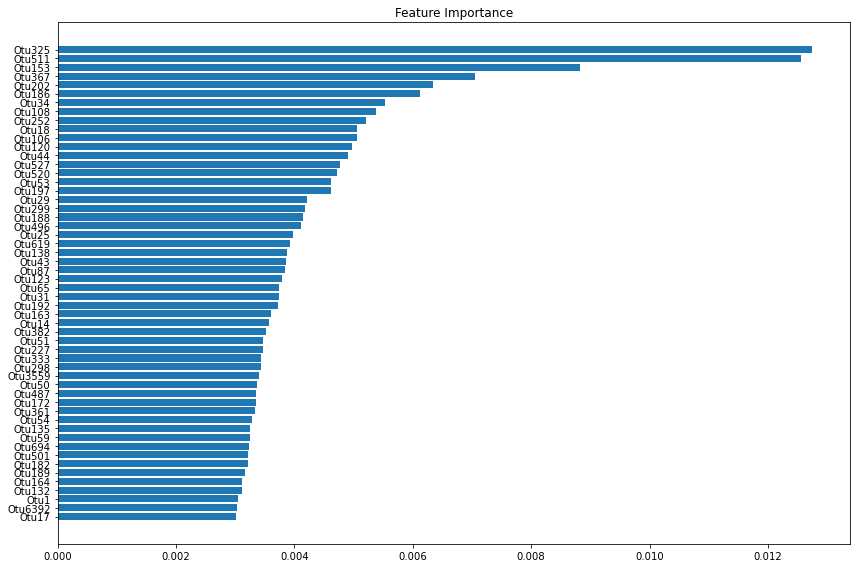

In [28]:
# plot feature importance
indices = np.argsort(filter_feature)
selectn = filter_feature.shape[0]
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111)

ax.barh(range(selectn),filter_feature[indices])
ax.set_yticks(range(selectn))
ax.set_yticklabels(indices[::-1].index)
ax.set_title('Feature Importance')
plt.tight_layout()
plt.savefig("feature_improtance.svg",format="svg")
plt.show()

# 模型评估

In [29]:
#混淆矩阵
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          AA       0.24      0.24      0.24        21
          CR       0.37      0.30      0.33        23
         NAA       0.00      0.00      0.00        18
          NM       0.24      0.37      0.29        30
          PL       0.00      0.00      0.00        16

    accuracy                           0.21       108
   macro avg       0.17      0.18      0.17       108
weighted avg       0.19      0.21      0.20       108



In [30]:
array_confusion = metrics.confusion_matrix(y_test, y_pred)
cm = array_confusion
array_confusion = array_confusion.T
array_confusion

array([[ 5,  4,  3,  6,  3],
       [ 1,  7,  6,  4,  1],
       [ 3,  3,  0,  7,  3],
       [10,  8,  8, 11,  9],
       [ 2,  1,  1,  2,  0]], dtype=int64)

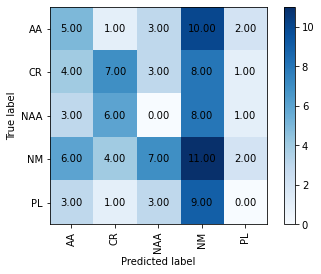

In [31]:
#绘制混淆矩阵图
def plot_confusion_matrix(cm,labels):
    ind_array = np.arange(len(labels))
    x, y = np.meshgrid(ind_array, ind_array)
    plt.imshow(cm, interpolation='nearest',cmap="Blues")
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        plt.text(x_val, y_val, "%0.2f" % (c,), color='black', fontsize=10, va='center', ha='center')
    plt.savefig("confusion_matrix.svg",format="svg")
# labels = ['CR','FJ','JK','JZ','XR'] 
labels = ['AA','CR','NAA','NM','PL'] #五分类
# labels = ['JK','FJ','CR'] #三分类
plot_confusion_matrix(cm,labels)

In [41]:
TP_0 = array_confusion[0,0]
FP_0 = sum(array_confusion[0,1:5])
FN_0 = sum(array_confusion[1:5,0])
TN_0 = sum(array_confusion[1,1:5]+array_confusion[2,1:5]+array_confusion[3,1:5]+array_confusion[4,1:5])-FN_0
# 输出肠癌的灵敏度和特异性
print('进展的灵敏度为：%.2f'%(TP_0/(TP_0+FN_0)))
print('进展的特异性为：%.2f'%(TN_0/(FP_0+TN_0)))

进展的灵敏度为：0.24
进展的特异性为：0.77


In [40]:
TP_1 = array_confusion[1,1]
FP_1 = array_confusion[1,0]+sum(array_confusion[1,2:5])
FN_1 = array_confusion[0,1]+sum(array_confusion[2:5,1])
TN_1 = sum(array_confusion[0,:5])+sum(array_confusion[2,:5])+sum(array_confusion[3,:5])+sum(array_confusion[4,:5])-FN_1
# 输出非进展的灵敏度和特异性
print('肠癌的灵敏度为：%.2f'%(TP_1/(TP_1+FN_1)))
print('肠癌的特异性为：%.2f'%(TN_1/(TN_1+FP_1)))

肠癌的灵敏度为：0.30
肠癌的特异性为：0.86


In [39]:
TP_1 = array_confusion[2,2]
FP_1 = sum(array_confusion[2,0:2])+sum(array_confusion[2,3:5])
FN_1 = sum(array_confusion[0:2,2])+sum(array_confusion[3:5,2])
TN_1 = sum(array_confusion[0,])+sum(array_confusion[1,])+sum(array_confusion[3,])+sum(array_confusion[4,])-FN_1
# 输出健康的灵敏度和特异性
print('非进展的灵敏度为：%.2f'%(TP_1/(TP_1+FN_1)))
print('非进展的特异性为：%.2f'%(TN_1/(TN_1+FP_1)))

非进展的灵敏度为：0.00
非进展的特异性为：0.82


In [38]:
TP_1 = array_confusion[3,3]
FP_1 = sum(array_confusion[3,0:3])+sum(array_confusion[3,4:5])
FN_1 = sum(array_confusion[0:3,3])+sum(array_confusion[4:5,3])
TN_1 = sum(array_confusion[0,])+sum(array_confusion[1,])+sum(array_confusion[2,])+sum(array_confusion[4,])-FN_1
# 输出进展的灵敏度和特异性
print('健康的灵敏度为：%.2f'%(TP_1/(TP_1+FN_1)))
print('健康的特异性为：%.2f'%(TN_1/(TN_1+FP_1)))

健康的灵敏度为：0.37
健康的特异性为：0.55


In [37]:
TP_1 = array_confusion[4,4]
FP_1 = sum(array_confusion[4,0:4])
FN_1 = sum(array_confusion[0:4,4])
TN_1 = sum(array_confusion[0,])+sum(array_confusion[1,])+sum(array_confusion[2,])+sum(array_confusion[3,])-FN_1
# 输出息肉的灵敏度和特异性
print('息肉的灵敏度为：%.2f'%(TP_1/(TP_1+FN_1)))
print('息肉的特异性为：%.2f'%(TN_1/(TN_1+FP_1)))

息肉的灵敏度为：0.00
息肉的特异性为：0.93
